# Importing the necessary libraries

In [ ]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np


# Importing the dataset

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

# Proportion of Labels

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

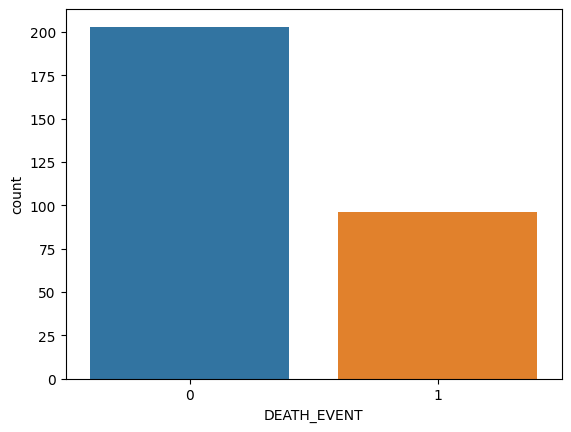

In [ ]:
sns.countplot(x='DEATH_EVENT', data=df)

In [ ]:
c0 = df[df.DEATH_EVENT==0]
c1 = df[df.DEATH_EVENT==1]
print(f'label 0: {len(c0)}\nlabel 1: {len(c1)}')

label 0: 203
label 1: 96


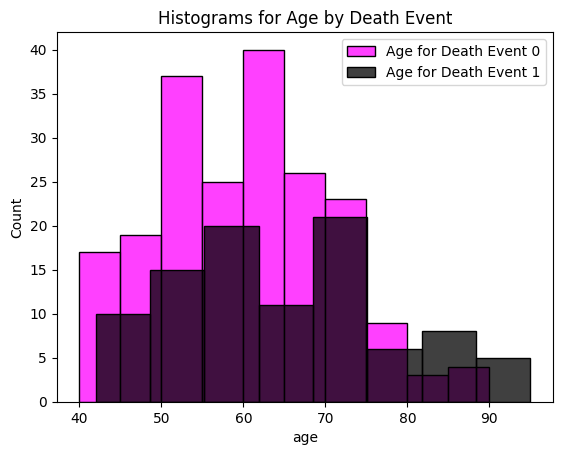

In [ ]:
sns.histplot(c0.age,kde=False,color="magenta", label="Age for Death Event 0")
sns.histplot(c1.age,kde=False,color = "black", label = "Age for Death Event 1")
plt.title("Histograms for Age by Death Event")
plt.legend()

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df, kind = 'kde')

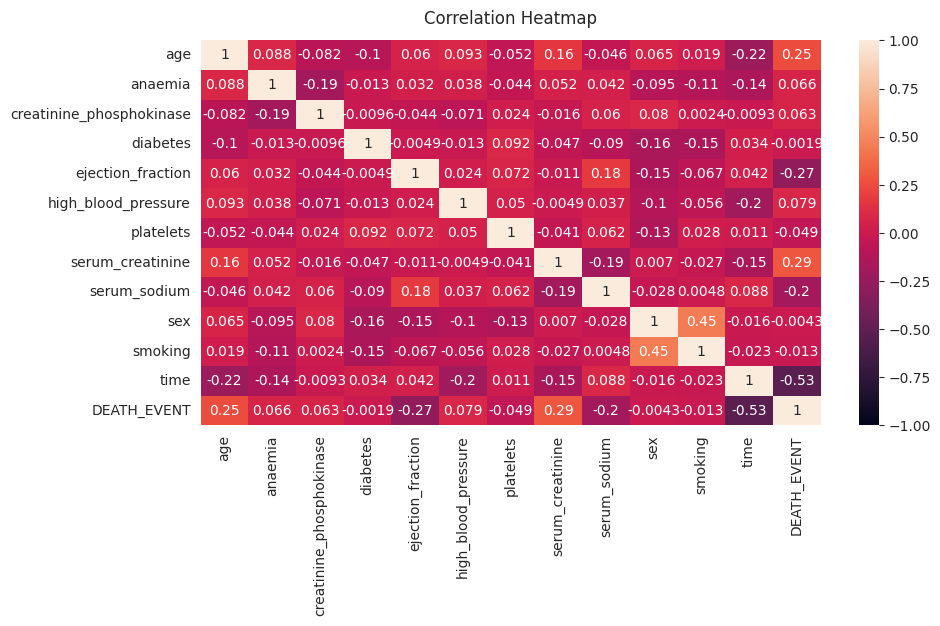

In [ ]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Splitting the dataset into train and test data set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 11)

In [ ]:
print(f'Data train: {len(X_train)}')
print(f'Data test: {len(y_test)}')

Data train: 224
Data test: 75


# Non Pruning Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=11, criterion='entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=11)

In [ ]:
npr_pred=dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, npr_pred)
acc_dtc

0.6933333333333334

In [ ]:
print(classification_report(y_test, npr_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.56      0.58      0.57        26

    accuracy                           0.69        75
   macro avg       0.66      0.67      0.66        75
weighted avg       0.70      0.69      0.69        75



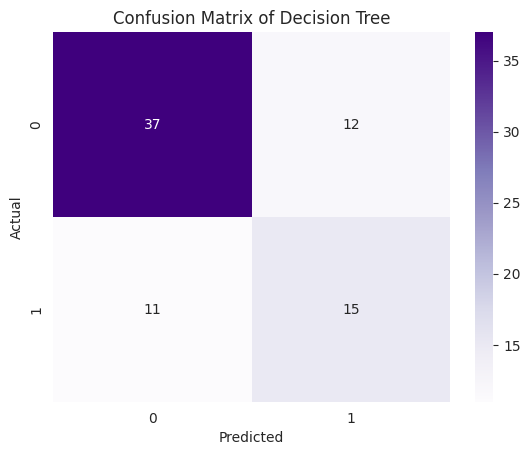

In [ ]:
cm = confusion_matrix(y_test, npr_pred)
ax = sns.heatmap(cm, annot=True, cmap="Purples")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

[Text(0.4296875, 0.9444444444444444, 'x[11] <= 73.5\nentropy = 0.896\nsamples = 224\nvalue = [154, 70]'),
 Text(0.15625, 0.8333333333333334, 'x[8] <= 136.5\nentropy = 0.706\nsamples = 52\nvalue = [10, 42]'),
 Text(0.0625, 0.7222222222222222, 'x[4] <= 47.5\nentropy = 0.345\nsamples = 31\nvalue = [2, 29]'),
 Text(0.03125, 0.6111111111111112, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.09375, 0.6111111111111112, 'x[7] <= 1.05\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.0625, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.125, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.25, 0.7222222222222222, 'x[8] <= 139.5\nentropy = 0.959\nsamples = 21\nvalue = [8, 13]'),
 Text(0.21875, 0.6111111111111112, 'x[0] <= 59.0\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(0.1875, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.5, 'x[7] <= 1.25\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.1875, 0.3888888888888889, 'x

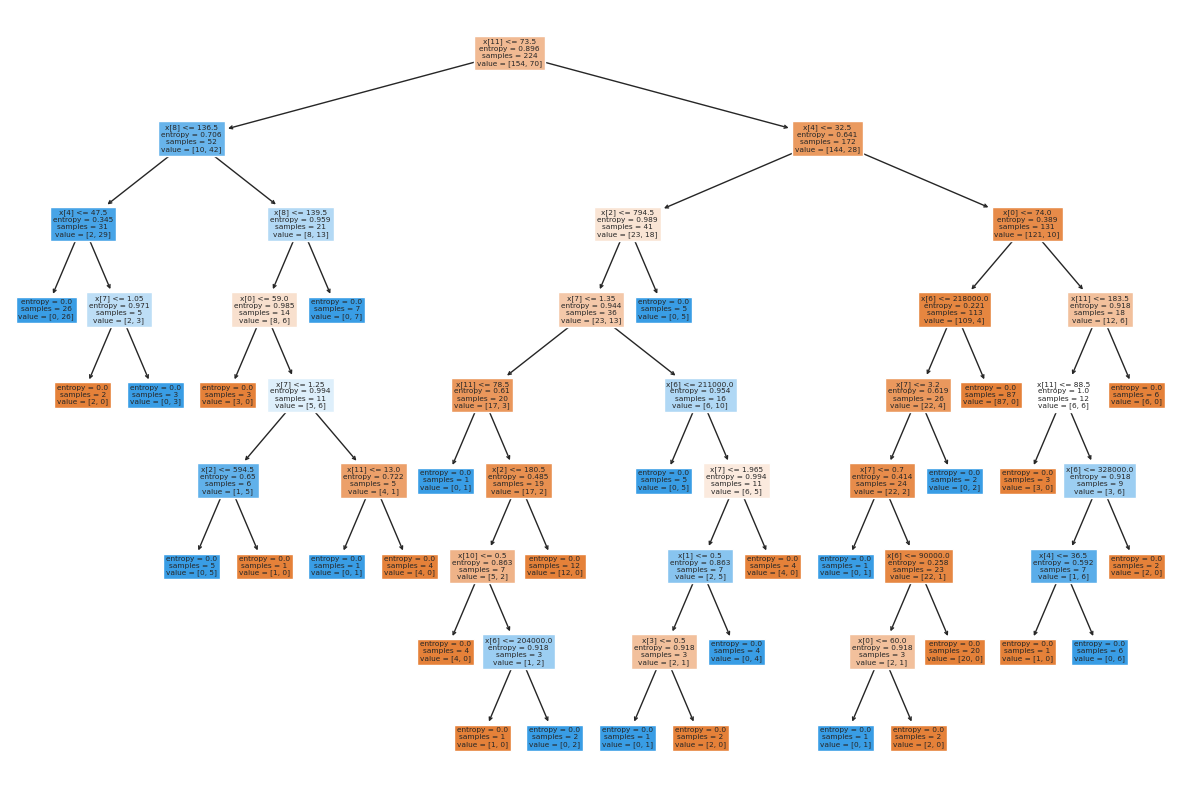

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy', max_features=0.5, min_samples_leaf=10, random_state=11, n_jobs=1)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=0.5,
                       min_samples_leaf=10, n_jobs=1, random_state=11)

In [ ]:
rf_pred = rf.predict(X_test)
acc_rf = accuracy_score(y_test, rf_pred)
acc_rf

0.8933333333333333

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.85      0.85      0.85        26

    accuracy                           0.89        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.89      0.89      0.89        75



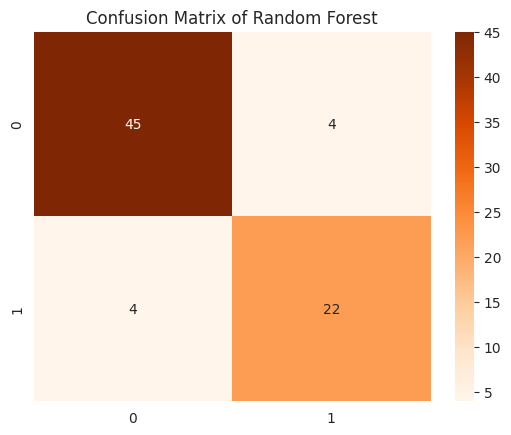

In [ ]:
cm2 = confusion_matrix(y_test, rf_pred)
ax2 = sns.heatmap(cm2, annot=True, cmap="Oranges")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(X_test)
acc_lr = accuracy_score(y_test, lr_pred)
acc_lr

0.8266666666666667

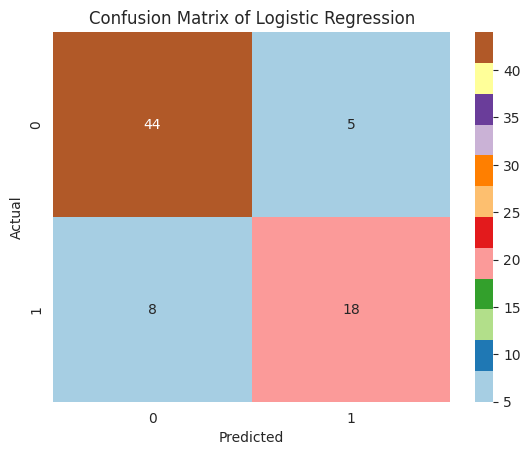

In [ ]:
cm3 = confusion_matrix(y_test, lr_pred)
ax = sns.heatmap(cm3, annot=True, cmap="Paired")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# Support Vector Machine

In [ ]:
SVM = SVC(kernel = 'linear',C = 0.3)
sv = SVM.fit(X_train, y_train)

In [ ]:
sv_pred = sv.predict(X_test)
acc_sv = accuracy_score(y_test, sv_pred)
acc_sv

0.76

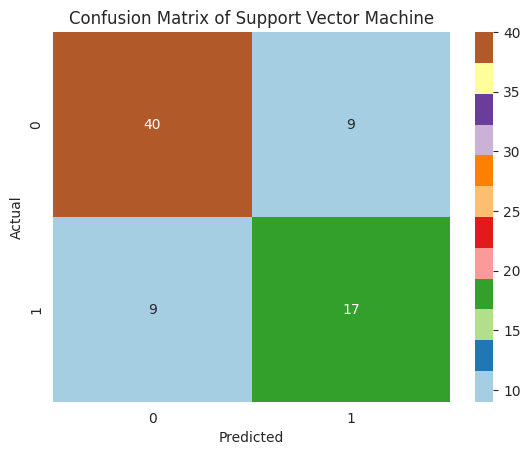

In [ ]:
cm4 = confusion_matrix(y_test, sv_pred)
ax = sns.heatmap(cm4, annot=True, cmap="Paired")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Confusion Matrix of Support Vector Machine')
plt.show()

# Oversampling using SMOTE

[Text(0.5, 1.0, 'Proportion of y after oversampligs')]

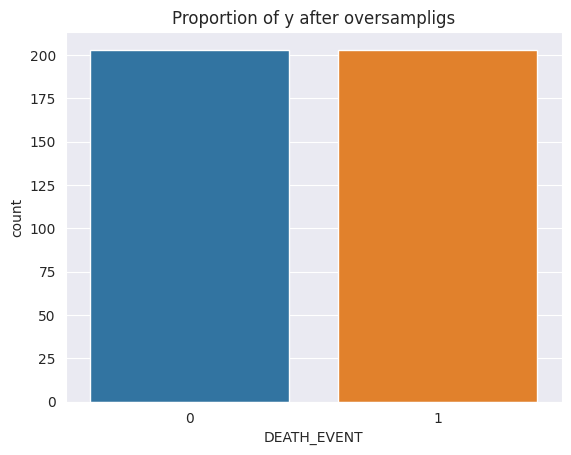

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
sns.countplot(x=y_res).set(title='Proportion of y after oversampligs')

# Splitting oversampled data

In [ ]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.25, random_state=11)


In [ ]:
print(f'Count of X: {X_res.shape}\ncount of y: {y_res.shape}')

Count of X: (406, 12)
count of y: (406,)


In [ ]:
pr_pred_res=dtc.predict(X_test_res)
acc_dtcovs = accuracy_score(y_test_res, pr_pred_res)
acc_dtcovs

0.8529411764705882

In [ ]:
print(classification_report(y_test_res, pr_pred_res))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        51
           1       0.88      0.82      0.85        51

    accuracy                           0.85       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.85      0.85      0.85       102



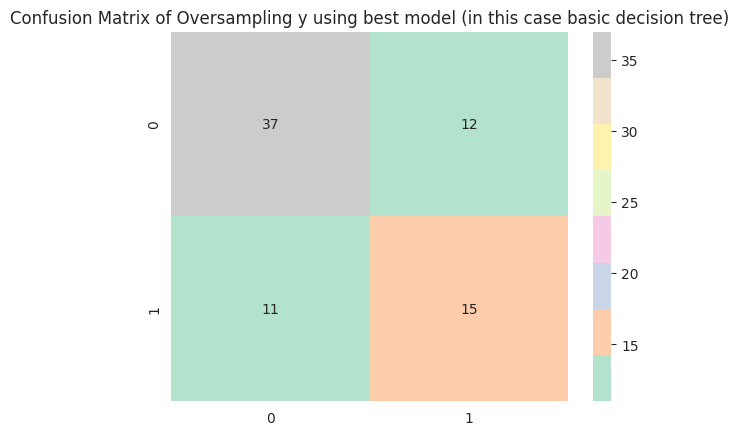

In [ ]:
cm4 = confusion_matrix(y_test_res, pr_pred_res)
ax4 = sns.heatmap(cm, annot=True, cmap="Pastel2")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Confusion Matrix of Oversampling y using best model (in this case basic decision tree)')
plt.show()

# Model Comparision

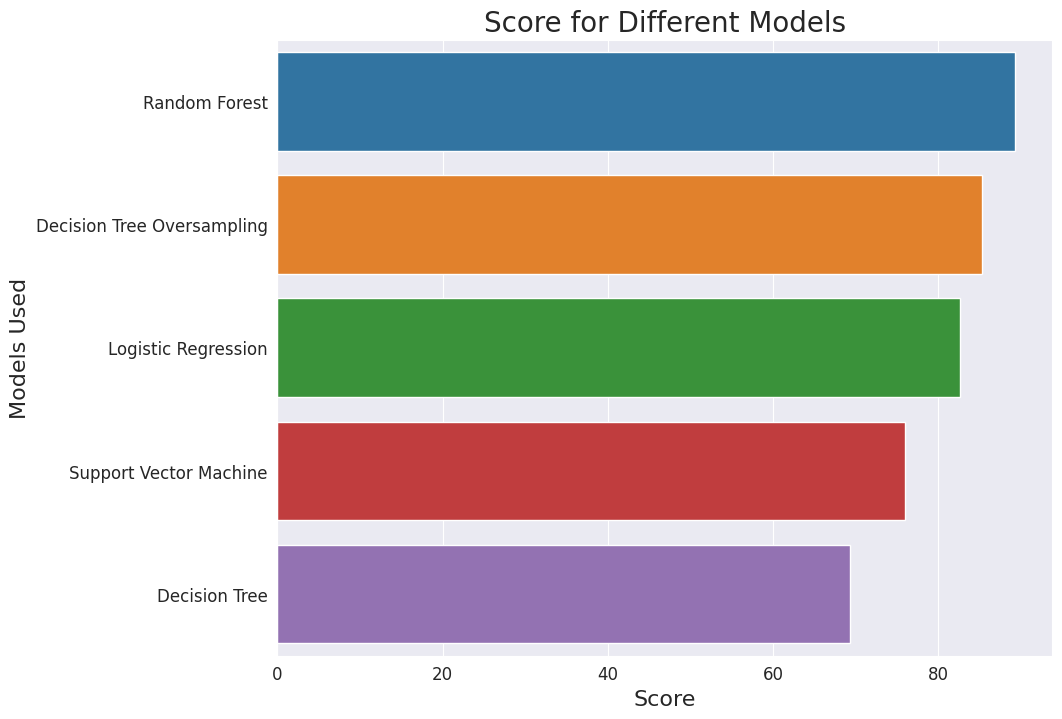

In [ ]:
data = {'Decision Tree': acc_dtc * 100,
        'Random Forest': acc_rf * 100,
        'Logistic Regression': acc_lr * 100,
        'Decision Tree Oversampling': acc_dtcovs * 100,
        'Support Vector Machine': acc_sv * 100
}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (10, 8))
sns.barplot(x = score, y = models)
plt.xlabel("Score", size = 16)
plt.xticks(size = 12)
plt.ylabel("Models Used", size = 16)
plt.yticks(size = 12)
plt.title("Score for Different Models", size = 20)
plt.show()